1. Importación de librería

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

2. Lectura y preprocesamiento de dato

In [2]:
# Leer el archivo CSV
df = pd.read_csv("tabla_nutricional.csv", sep=";")

# Reemplazar valores faltantes por 0
df.fillna(0, inplace=True)

# Convertir nombres de columnas a formato uniforme
df.columns = df.columns.str.strip()

# Pasar todos los valores a unidad por gramo
df["Cantidad (gr/ml)"] = df["Cantidad (gr/ml)"].replace(0, np.nan)
nutrientes = df.columns[2:]  # columnas nutricionales
for col in nutrientes:
    df[col] = df[col] / df["Cantidad (gr/ml)"]

# Eliminar columna de cantidad y mantener solo nutrientes por gramo
df_nutri = df[nutrientes].copy()
df_nutri.fillna(0, inplace=True)

⚙️ 3. Aplicar ACP

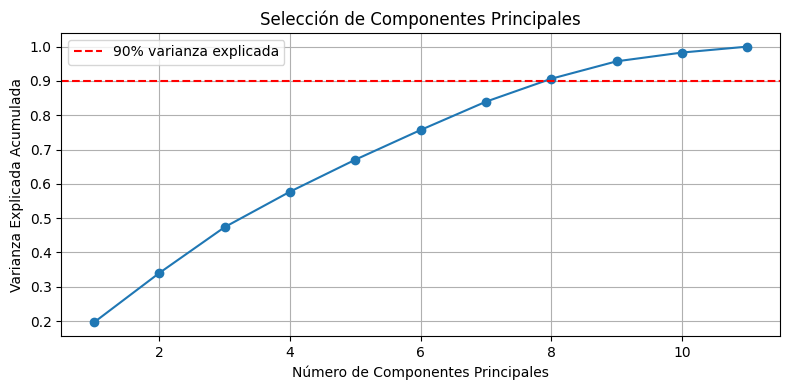

In [3]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_nutri)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# Graficar varianza explicada acumulada
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% varianza explicada')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección de Componentes Principales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

📊 4. Visualización de alimentos en el nuevo espacio

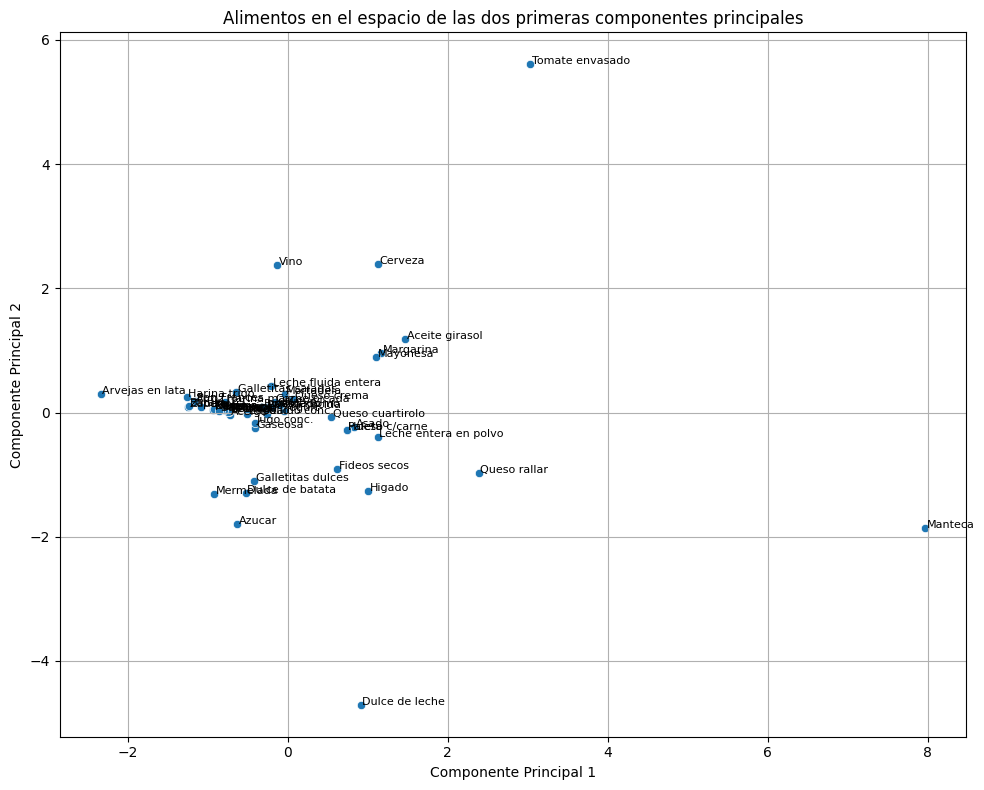

In [4]:
# Crear DataFrame con las dos primeras componentes
df_pca = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
df_pca["Alimento"] = df["Alimento"]

# Graficar alimentos en el plano PC1-PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2")
for i in range(df_pca.shape[0]):
    plt.text(df_pca["PC1"][i]+0.02, df_pca["PC2"][i], df_pca["Alimento"][i], fontsize=8)
plt.title("Alimentos en el espacio de las dos primeras componentes principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()